# Importing data

# Extracting month from dates

In [22]:
chase_2022['Month'] = chase_2022['Posting Date'].dt.month
capitol_2022['Month'] = capitol_2022['Posted Date'].dt.month
chase_2023['Month'] = chase_2023['Posting Date'].dt.month
chase_2023 = chase_2023[chase_2023['Month'] < 12]
chase_12['Month'] = chase_12['Posting Date'].dt.month
capitol_2023['Month'] = capitol_2023['Posted Date'].dt.month
capitol_12['Month'] = capitol_12['Posted Date'].dt.month
capitol_2023 = capitol_2023[capitol_2023['Month'] < 12]

# Converting currency columns into integers

In [23]:
chase_2022['Amount'] = chase_2022['Amount'].astype(int)
capitol_2022 = capitol_2022.dropna(subset = ['Debit'])
capitol_2022['Debit'] = capitol_2022['Debit'].astype(int)
chase_2023['Amount'] = chase_2023['Amount'].astype(int)
chase_12['Amount'] = chase_12['Amount'].astype(int)
capitol_2023 = capitol_2023.dropna(subset = ['Debit'])
capitol_2023['Debit'] = capitol_2023['Debit'].astype(int)
capitol_12 = capitol_12.dropna(subset = ['Debit'])
capitol_12['Debit'] = capitol_12['Debit'].astype(int)

# Creating columns for Income and Expenses

In [24]:
import numpy as np

chase_2022['Income'] = np.where(chase_2022['Description'].str.contains('PAYROLL'), chase_2022['Amount'], 0)
chase_2022['Expenses'] = np.where(chase_2022['Amount'] < 0, chase_2022['Amount'].abs(), 0)
capitol_2022 = capitol_2022.rename(columns = {'Debit':'Expenses'})

chase_2023['Income'] = np.where(chase_2023['Description'].str.contains('PAYROLL'), chase_2023['Amount'], 0)
chase_2023['Expenses'] = np.where(chase_2023['Amount'] < 0, chase_2023['Amount'].abs(), 0)
capitol_2023 = capitol_2023.rename(columns = {'Debit':'Expenses'})

chase_12['Income'] = np.where(chase_12['Description'].str.contains('PAYROLL'), chase_12['Amount'], 0)
chase_12['Expenses'] = np.where(chase_12['Amount'] < 0, chase_12['Amount'].abs(), 0)
capitol_12 = capitol_12.rename(columns = {'Debit':'Expenses'})

# Income & Expenses 2022

In [25]:
income_2022 = chase_2022.groupby('Month')['Income'].sum().reset_index()
expenses_2022_1 =  chase_2022.groupby('Month')['Expenses'].sum().reset_index()
expenses_2022_2 = capitol_2022.groupby('Month')['Expenses'].sum().reset_index()
expenses_2022 = pd.merge(expenses_2022_1, expenses_2022_2, on = 'Month')
expenses_2022['Expenses'] = expenses_2022['Expenses_x'] + expenses_2022['Expenses_y']
expenses_2022 = expenses_2022[['Month', 'Expenses']]
fy_2022 = pd.merge(income_2022, expenses_2022, on = 'Month')

print(display(fy_2022))

,Month,Income,Expenses
0,1,1395,833
1,2,1438,1017
2,3,1258,862
3,4,1504,1090
4,5,1623,2343
5,6,1803,1635
6,7,3015,1687
7,8,1990,1975
8,9,2184,1348
9,10,2067,1802


None


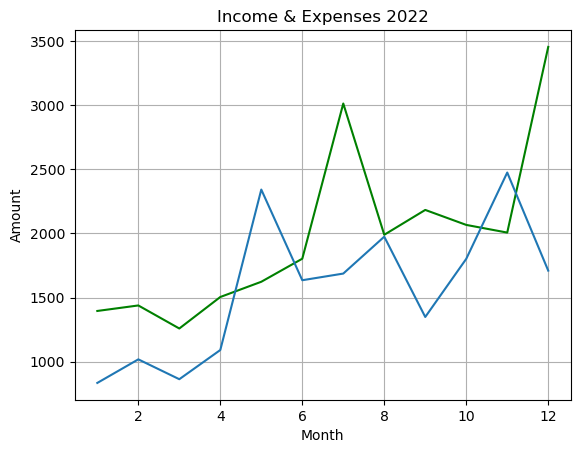

In [26]:
import matplotlib.pyplot as plt

x = fy_2022['Month']
y = fy_2022['Income']
y_2 = fy_2022['Expenses']

plt.plot(x, y, color = 'green')
plt.plot(x, y_2)
plt.title('Income & Expenses 2022')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

# Income & Expenses 2023

In [27]:
income_2023 = chase_2023.groupby('Month')['Income'].sum().reset_index()
expenses_2023_1 = chase_2023.groupby('Month')['Expenses'].sum().reset_index()
income_12 = chase_12.groupby('Month')['Income'].sum().reset_index()
expenses_12_1 = chase_12.groupby('Month')['Expenses'].sum().reset_index()
expenses_2023_2 = capitol_2023.groupby('Month')['Expenses'].sum().reset_index()
expenses_12_2 = capitol_12.groupby('Month')['Expenses'].sum().reset_index()
expenses_2023 = pd.merge(expenses_2023_1, expenses_2023_2, on = 'Month')
expenses_2023['Expenses'] = expenses_2023['Expenses_x'] + expenses_2023['Expenses_y']
expenses_2023 = expenses_2023[['Month', 'Expenses']]
expenses_12 = pd.merge(expenses_12_1, expenses_12_2, on = 'Month')
expenses_12['Expenses'] = expenses_12['Expenses_x'] + expenses_12['Expenses_y']
expenses_12 = expenses_12[['Month', 'Expenses']]
income_2023 = pd.merge(income_2023, income_12, on = ('Month', 'Income'), how = 'outer')
expenses_2023 = pd.merge(expenses_2023, expenses_12, on = ('Month', 'Expenses'), how = 'outer')
fy_2023 = pd.merge(income_2023, expenses_2023, on = 'Month')

print(display(fy_2023))

,Month,Income,Expenses
0,1,2639,3605
1,2,2098,1830
2,3,1900,1173
3,4,1889,2428
4,5,1932,2773
5,6,3107,3845
6,7,1968,2300
7,8,2050,3106
8,9,2041,3122
9,10,1783,3205


None


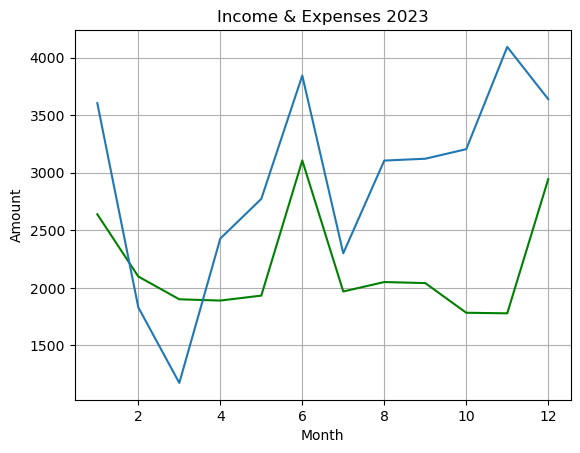

In [28]:
x = fy_2023['Month']
y = fy_2023['Income']
y_2 = fy_2023['Expenses']

plt.plot(x, y, color = 'green')
plt.plot(x, y_2)
plt.title('Income & Expenses 2023')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

# Total Income & Expenses

In [29]:
print('yearly income 2022', fy_2022['Income'].sum())
print('yearly expenses 2022: ', fy_2022['Expenses'].sum())
print('yearly income 2023: ', fy_2023['Income'].sum())
print('yearly expenses 2023: ', fy_2023['Expenses'].sum())

yearly income 2022 23741
yearly expenses 2022:  18778
yearly income 2023:  26129
yearly expenses 2023:  35121


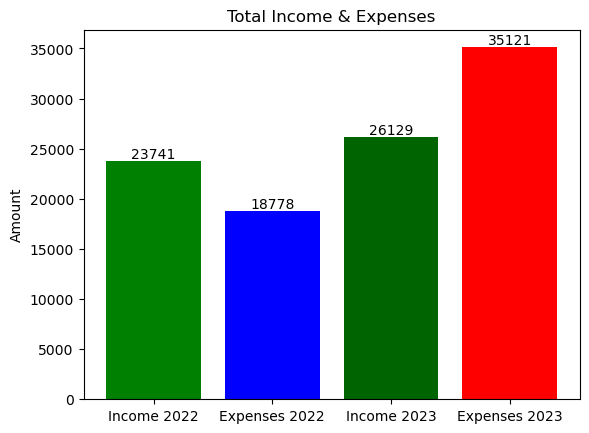

In [30]:
labels = ['Income 2022', 'Expenses 2022', 'Income 2023', 'Expenses 2023']
values = [fy_2022['Income'].sum(),  fy_2022['Expenses'].sum(), fy_2023['Income'].sum(), fy_2023['Expenses'].sum()]
plt.bar_label(plt.bar(labels, values, color = ['green', 'blue', 'darkgreen', 'red']), values)
plt.title('Total Income & Expenses')
plt.ylabel('Amount')
plt.show()

# Average Income

In [31]:
avg_income_2022 = chase_2022[['Posting Date', 'Income']]
avg_income_2022 = avg_income_2022[avg_income_2022['Income'] > 0]
avg_income_2023 = chase_2023[['Posting Date', 'Income']]
avg_income_2023 = avg_income_2023[avg_income_2023['Income'] > 0]
avg_income_12 = chase_12[['Posting Date', 'Income']]
avg_income_12 = avg_income_12[avg_income_12['Income'] > 0]
avg_income_2023 = pd.merge(avg_income_2023, avg_income_12, on = ('Posting Date', 'Income'), how = 'outer')

print('weekly average income 2022: ', avg_income_2022['Income'].mean().astype(int))
print('monthly average income 2022: ', fy_2022['Income'].mean().astype(int))
print('average weekly income 2023: ', avg_income_2023['Income'].mean().astype(int))
print('average monthly income 2023: ', fy_2023['Income'].mean().astype(int))

weekly average income 2022:  913
monthly average income 2022:  1978
average weekly income 2023:  1004
average monthly income 2023:  2177


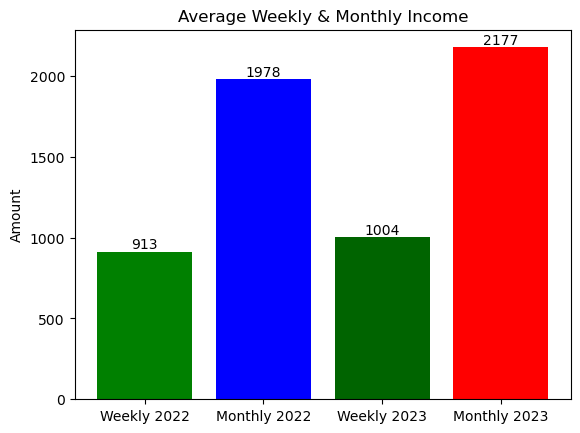

In [32]:
labels = ['Weekly 2022', 'Monthly 2022', 'Weekly 2023', 'Monthly 2023']
values = [avg_income_2022['Income'].mean().astype(int), fy_2022['Income'].mean().astype(int), avg_income_2023['Income'].mean().astype(int), fy_2023['Income'].mean().astype(int)]

plt.bar_label(plt.bar(labels, values, color = ['green', 'blue', 'darkgreen', 'red']), values)
plt.title('Average Weekly & Monthly Income')
plt.ylabel('Amount')
plt.show()